## Link to dataset:
 - Kaggle - https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda
 - GitHub - https://github.com/soumyadas96/Data-Analysis-Projects/blob/main/Black%20Friday%20Sales/Black%20Friday.csv

## About Dataset:

A retail company “**ABC Private Limited**” wants to understand the customer purchase behaviour (specifically, **Purchase** amount) against transactions in their store on **Black Friday**.

The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and total revenue from the sales on Black Friday.

Now, the company wants us to analyze the data and give recommendations on how they can increase/ boost sales.

### Columns in the dataset:

User_ID - Product_ID - Gender - Age - Occupation - City_Category - Stay_In_Current_City_Years - Marital_Status - Product_Category_1 - Product_Category_2 - Product_Category_3 - Purchase

### Here's our approach:

We will achieve our goal in 3 phases:

1. **Data Cleaning :** We will check all the dataset for any mishandled row / column with null values or outliers (based on the distribution followed) and take required actions.
2. **Data Analysis :** We will carry out Univariate, Bivariate, and Multivariate Analysis between each columns and end up with correlation analysis to confirm our findings.
3. **Findings and Recommendations :** Lastly, we will gather our findings to give final recommendations.

### Tool and Libraries Used:

- Tool
 - Python 3.11.7
- Libraries
 - numpy 1.26.4
 - pandas 2.14
 - seaborn 0.13.2
 - matplotlib 3.8.0
 
### What questions are expected to solve?

- Reliable relationships between variables/ columns.
- Which category of people to target the most?
- What were the winning products on black friday sales?
& many more.

## Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Black Friday.csv")
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [3]:
df.shape

(550068, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Data Cleaning

In [5]:
## finding %age of null values in columns having null values

null = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending=False),
                     'Percentage of Null Values' : 
                     (round(((df.isnull().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)),2)).astype(str)+"%"})
null[null['Null Values'] > 0]

,Null Values,Percentage of Null Values
Product_Category_3,383247,69.67%
Product_Category_2,173638,31.57%


In [6]:
## dropping Product_Category_3 as it has 

df = df.drop("Product_Category_3", axis = 1)
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [7]:
## choice of a product mostly is impacted by age
## classifying mode values in Product Category 2 on the basis of age

mode = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)

## replacing null values in Product_Category_2 with 
## the mode value of most bought elements in its group as per age group

for age in df["Age"].unique():
    age_mode = df.loc[df['Age'] == age ,'Product_Category_2'].fillna(mode[age])
    df.loc[df['Age']== age,'Product_Category_2'] = age_mode

## checking no. of null values now
df['Product_Category_2'].isnull().sum()

0

In [8]:
## Mode values are all integer types
## Converting data type of Product_Cartegory_2 to integer

df['Product_Category_2'] = df['Product_Category_2'].astype(int)

### Univariate Analysis

In [9]:
## gathering essential details before visualization and analysis

print()
print("--------- Null Values ---------")
print()
print(df.isnull().sum())
print()
print("------------------------------------------ Description ------------------------------------------")
print()
df.describe()


--------- Null Values ---------

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

------------------------------------------ Description ------------------------------------------



,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.228379,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.318496,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


In [10]:
## checking for duplicates
print('No. of duplicates in the dataset:',df.duplicated().sum())

No. of duplicates in the dataset: 0


#### Outliers in Target Column ("Purchase")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24840\2998725224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchase)


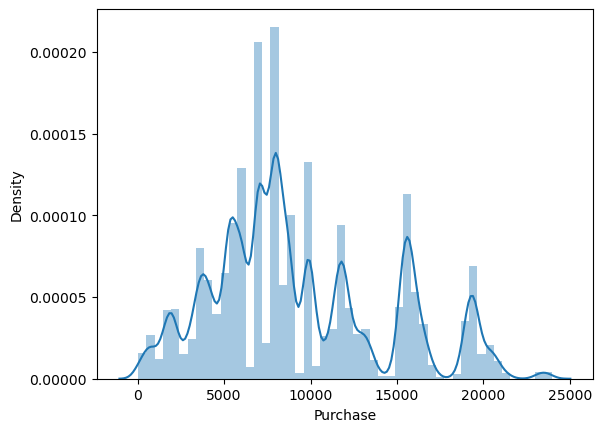

In [11]:
sns.distplot(df.Purchase)
plt.show()

###### Observation:
The plot shows neither Gaussian / Normal Distribution or  Skewness.

###### Box Plot

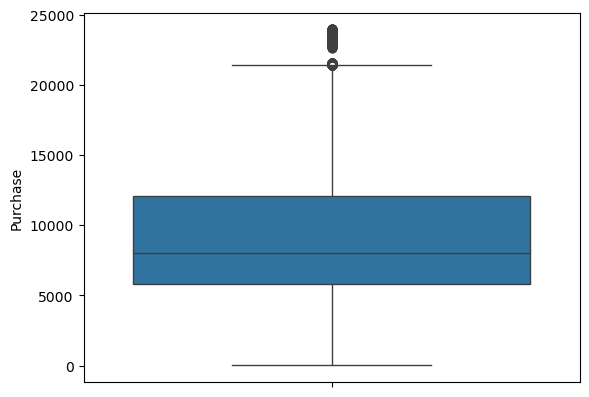

In [12]:
sns.boxplot(data = df, y = "Purchase")
plt.show()

##### Capping using Percentile approach

In [13]:
## creating a new dataframe with removed outliers
## we use percentile approach as the graphs for target coulumn purchase shows neither skewed nor normal distribution
## we will consider 1% to 99%

min_purchase_limit = df.Purchase.quantile(0.01)
max_purchase_limit = df.Purchase.quantile(0.99)

outliers = len(df[(df.Purchase < min_purchase_limit) | (df.Purchase > max_purchase_limit)])

#finding again no. of rows beyond the limit

print("Before capping:", outliers)

## capping outliers
df_no_outliers = df.copy()
df_no_outliers["Purchase"] = np.where(df_no_outliers["Purchase"] > max_purchase_limit, max_purchase_limit,
                                       np.where(df_no_outliers["Purchase"] < min_purchase_limit, min_purchase_limit, df_no_outliers["Purchase"]))

outliers_removed = len(df_no_outliers[(df_no_outliers.Purchase < min_purchase_limit) | (df_no_outliers.Purchase > max_purchase_limit)])

#finding again no. of rows beyond the limit after Outlier removal

print("After capping:", outliers_removed)

Before capping: 10972
After capping: 0


## Data Analysis

### Univariate Analysis

#### Outliers in Target Column

###### Violin Plot

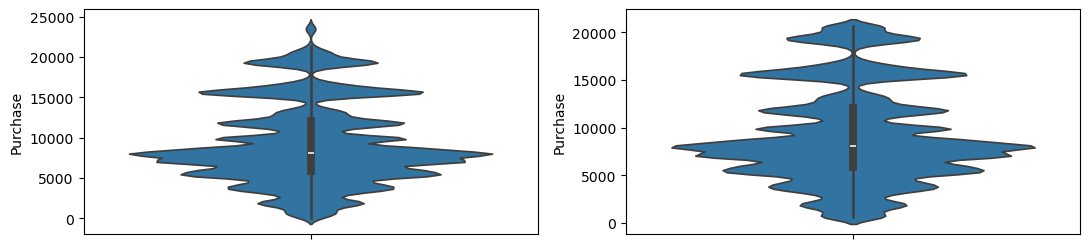

In [14]:
plt.figure(figsize = (11,5))

plt.subplot(221)
sns.violinplot(data = df, y = "Purchase")

plt.subplot(222)
sns.violinplot(data = df_no_outliers, y = "Purchase")

plt.tight_layout()
plt.show()

###### Observation:
The outliers in target column "**Purchase**"(Total Purchase Amount) contribute to the total sales and helps us to understand which customer or rather which category customers contributed the most and least to overall sales revenue. Hence, we consider both in further analysis

Total no. of Customers who purchased on Black Friday: 5891
Total no. of unique products that were sold on Black Friday: 3631


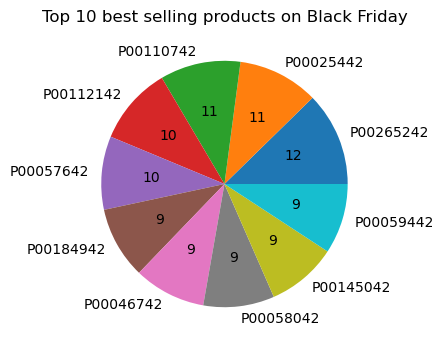

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
dtype: int64

In [15]:
## column (User_ID)

print("Total no. of Customers who purchased on Black Friday:",df.User_ID.nunique())

## column (Product_ID)

print("Total no. of unique products that were sold on Black Friday:",df.Product_ID.nunique())
plt.figure(figsize=(10,4))
df.groupby("Product_ID").size().sort_values(ascending = False).head(10).plot(kind = "pie", autopct = "%.0f", title = "Top 10 best selling products on Black Friday")
plt.show()
df.groupby("Product_ID").size().sort_values(ascending = False).head(3)

###### Observations:
1. 5891 users purchased on Black Friday sales.
2. 3623 unique products were sold on Black Friday.
3. The top 3 best selling products (sold/unit) are: P00265242, P00110742, and P00025442.

<Figure size 640x480 with 0 Axes>

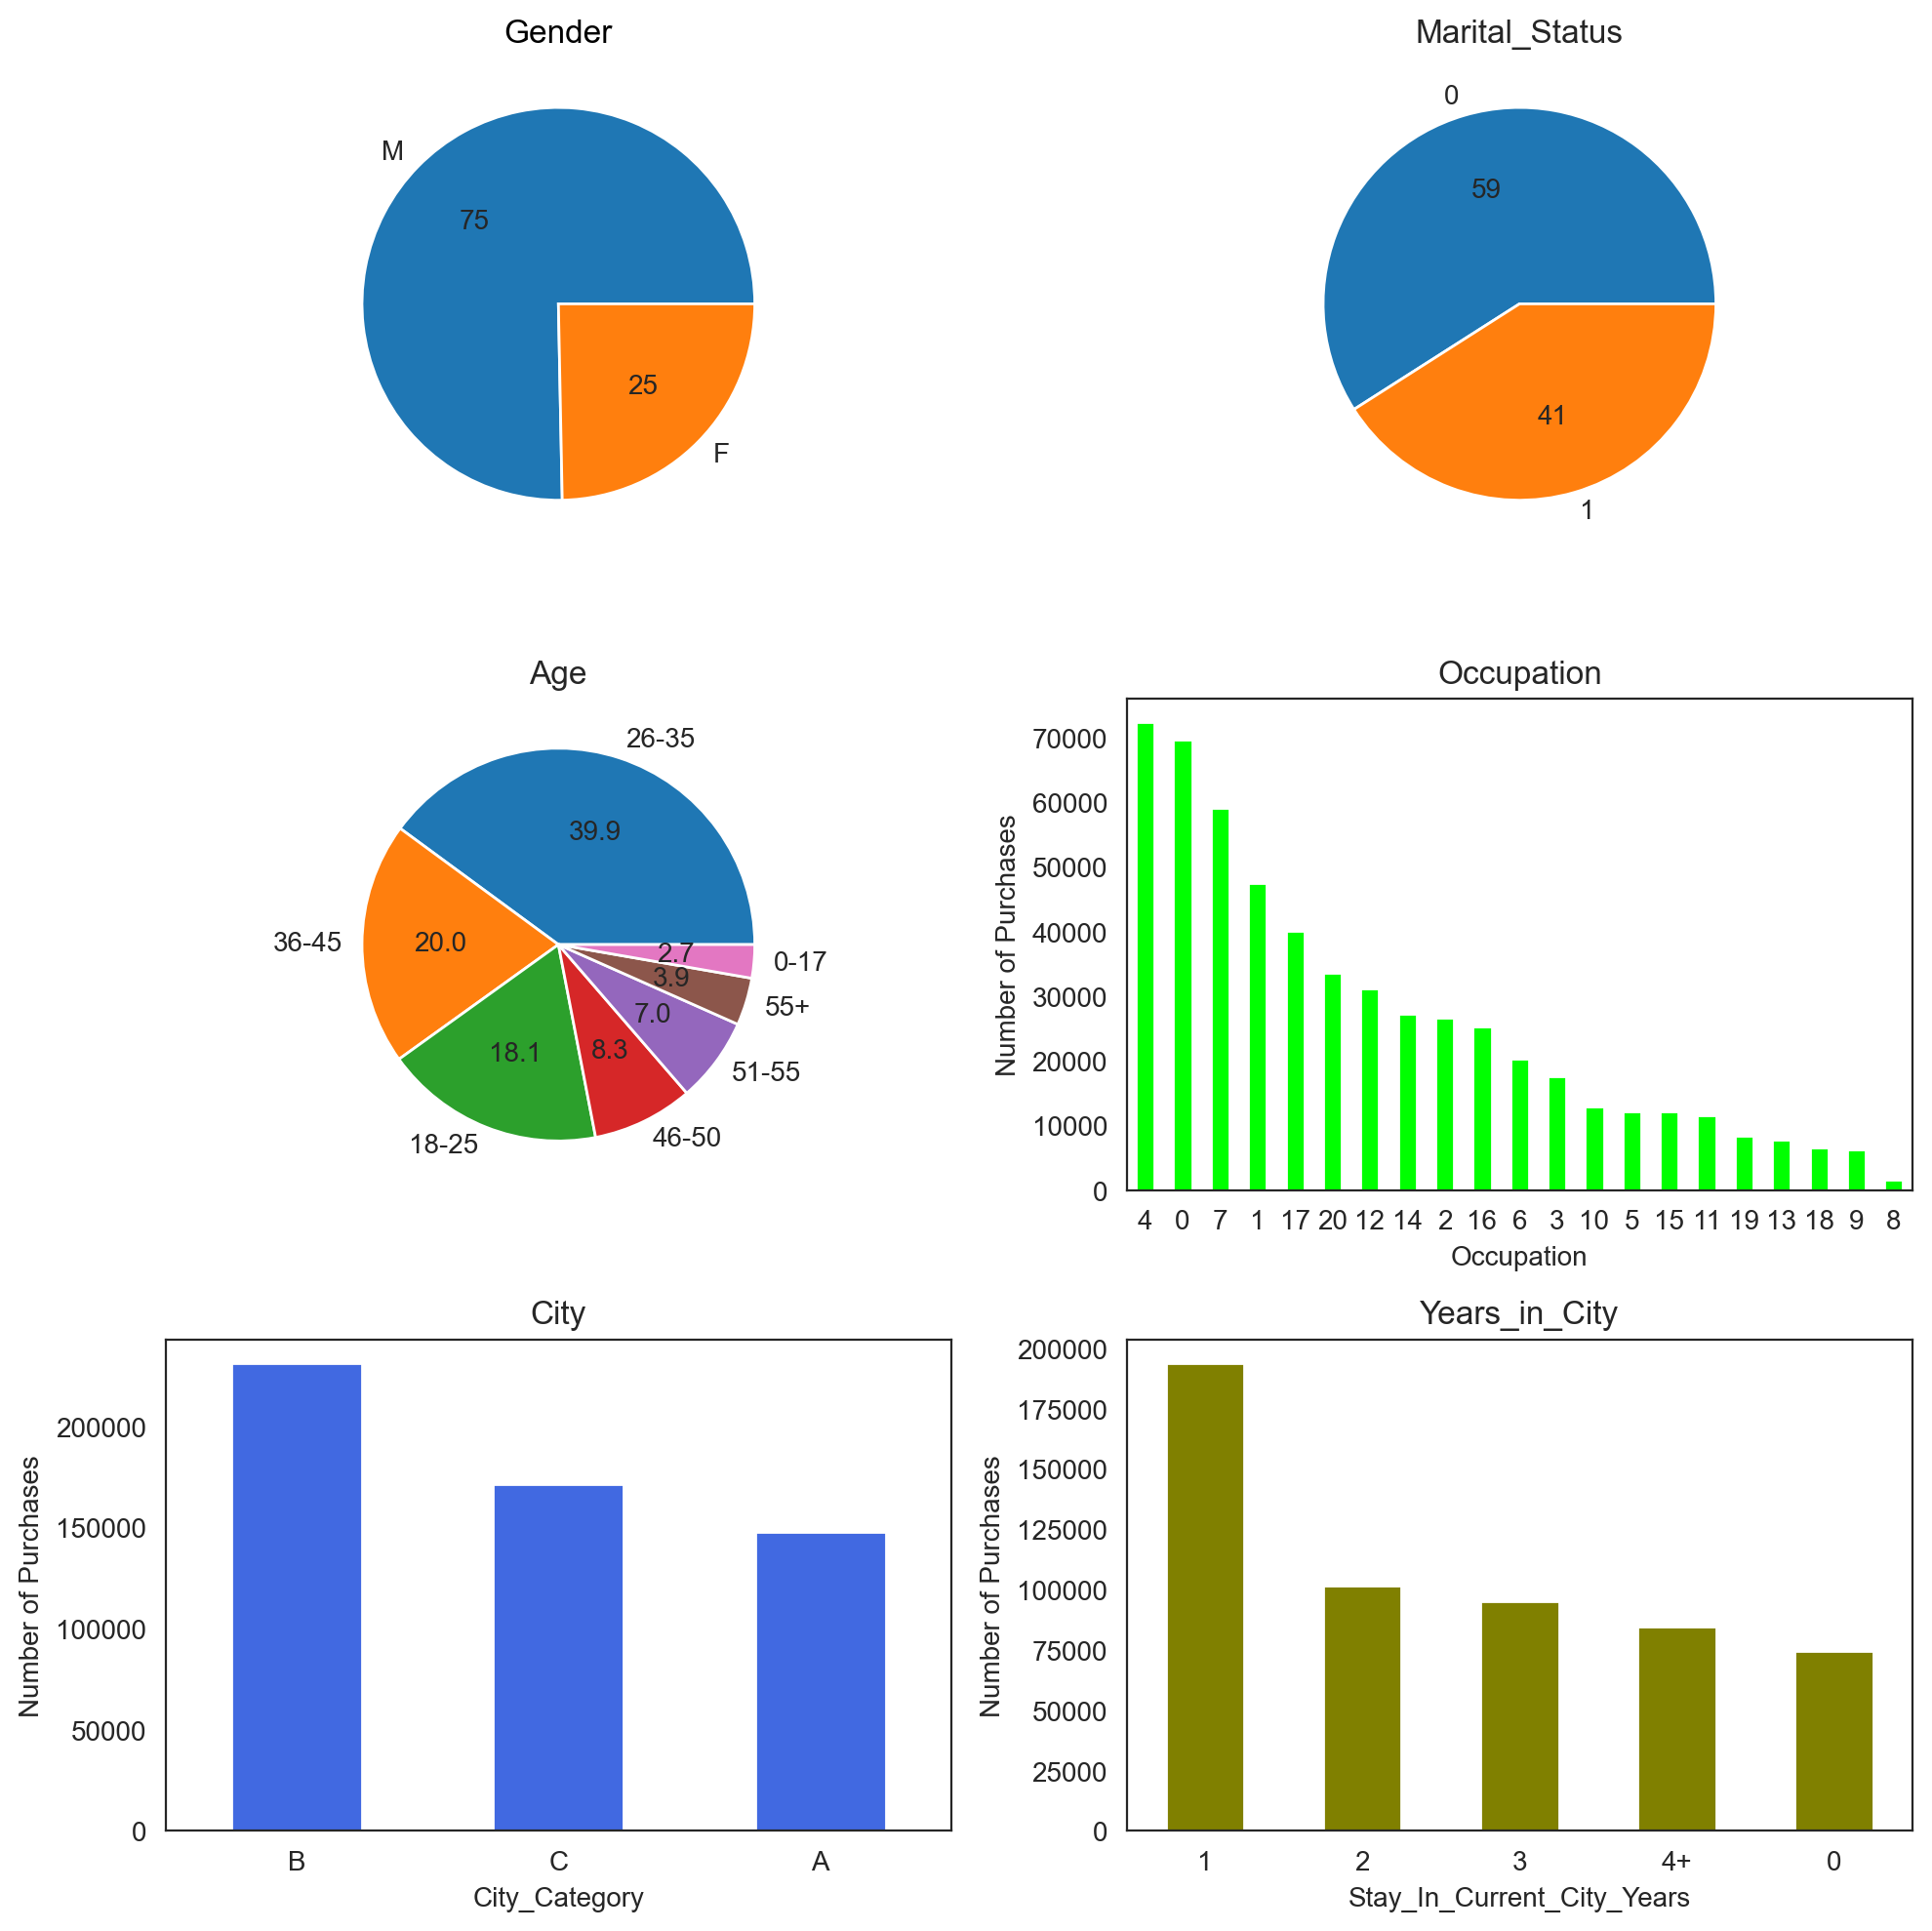

In [16]:
plt.figure(1)
plt.figure(figsize=(10,10), dpi = 200)

# Column (Gender)
plt.subplot(321)
sns.set_style(style = 'dark')
df['Gender'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Gender')

# Column (Marital_Status)
plt.subplot(322)
sns.set_style(style = 'white')
df['Marital_Status'].value_counts().plot(kind='pie', autopct = '%.0f',label = "")
plt.title('Marital_Status')

# Column (Age)
plt.subplot(323)
df['Age'].value_counts().plot(kind='pie', autopct = '%.1f', label = "")
plt.title('Age')

# Column (Occupation)
plt.subplot(324)
df['Occupation'].value_counts().plot(kind='bar',color='lime',rot=0)
plt.title('Occupation')
plt.ylabel("Number of Purchases")

# Column (City)
plt.subplot(325)
df['City_Category'].value_counts().plot(kind='bar',color='royalblue',rot=0)
plt.title('City')
plt.ylabel("Number of Purchases")

# Column (Years_in_City)
plt.subplot(326)
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.title('Years_in_City')
plt.ylabel("Number of Purchases")

plt.tight_layout()
plt.show()

###### Observations:
1. The Male : Female ratio of customers (on basis of no. of units sold/ purchased) on Black Friday is 75:25 or 3:1.
2. Out of the total no. of items sold, about 59% of it were sold to customers who were single/ unmarried while 41% were married.
3. Age group of 26-35 purchased the most number of items on Black Friday.
4. People who falls in the Occupation Category '4' purchased the most number of items.
5. People in City B purchased the most number of items on Black Friday.
6. People staying in the same city for 1 year purchased the most number of items on Black Friday.

### Bivariate Analysis

##### Analysis from User_ID

In [17]:
## Users on the basis of purchase

print("Most number of products bought by any user:",int(df.groupby("User_ID")["Product_ID"].nunique().sort_values(ascending = False).head(1)))
print("Highest Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(1)))
print("Average Order Value by a single individual:",int(df_no_outliers.groupby("User_ID")["Purchase"].mean().sort_values(ascending = False).head(1)))

Most number of products bought by any user: 1026
Highest Order Value by a single individual: 10536909
Average Order Value by a single individual: 18583


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24840\954285580.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Most number of products bought by any user:",int(df.groupby("User_ID")["Product_ID"].nunique().sort_values(ascending = False).head(1)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24840\954285580.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Highest Order Value by a single individual:",int(df.groupby("User_ID")["Purchase"].sum().sort_values(ascending = False).head(1)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24840\954285580.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Average Order Value by a single individual:",int(df_no_outliers.groupby("User_ID")["Purch

###### Observations:
1. Most number of products bought by any user is 1025.
2. Highest Order Value by a single individual is 10,536,783.
3. Average Order Value by a single individual is 18,583.


##### Analysis from Product_ID



---------------------------------------------------- Based on Gender and Marital Status ---------------------------------------------------




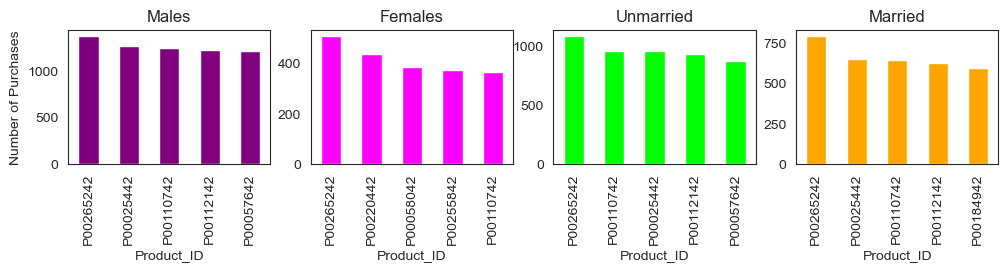



------------------------------------------------- Based on Age Groups and Occupation -------------------------------------------------




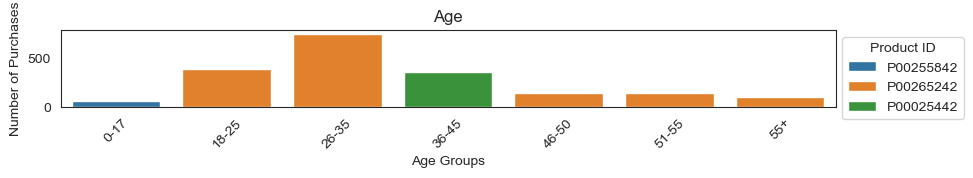

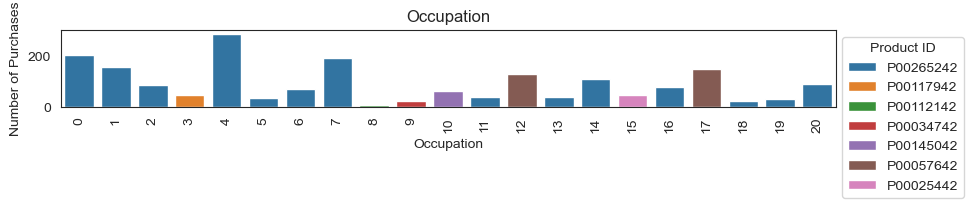

In [18]:
## top purchased products in each category


## columns 2 & 7

print("\n")
print("---------------------------------------------------- Based on Gender and Marital Status ---------------------------------------------------")
print("\n")
plt.figure(1,figsize = (12,8))
plt.tight_layout()

## top preferred products by males and females

plt.subplot(441)
male = df[df.Gender == "M"]
male.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'purple', title = "Males")
plt.ylabel("Number of Purchases")

plt.subplot(442)
female = df[df.Gender == "F"]
female.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'magenta', title = "Females")

## top preferred products by Married and Unmarried People

plt.subplot(443)
unmarried = df[df.Marital_Status == 0]
unmarried.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'lime', title = "Unmarried")

plt.subplot(444)
married = df[df.Marital_Status == 1]
married.Product_ID.value_counts().sort_values(ascending = False).head().plot(kind ='bar', color = 'orange', title = "Married")

plt.show()

## columns 3 & 4

print("\n")
print("------------------------------------------------- Based on Age Groups and Occupation -------------------------------------------------")
print("\n")

## top preferred products by groups of different ages

plt.figure(2,figsize = (10,1), dpi = 100)
product_counts = df.groupby(['Age', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each age

most_frequent_products = product_counts.loc[product_counts.groupby('Age')['Count'].idxmax()]

# Plotting
sns.barplot(x='Age', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Age')
plt.xlabel('Age Groups')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## top preferred products by groups of different Occupations

plt.figure(3,figsize = (10,1), dpi = 100)
product_counts = df.groupby(['Occupation', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each occupation

most_frequent_products = product_counts.loc[product_counts.groupby('Occupation')['Count'].idxmax()]

# Plotting

sns.barplot(x='Occupation', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Occupation')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()



---------------------------------------------------------- Based on City Type and Years in the City ----------------------------------------------------




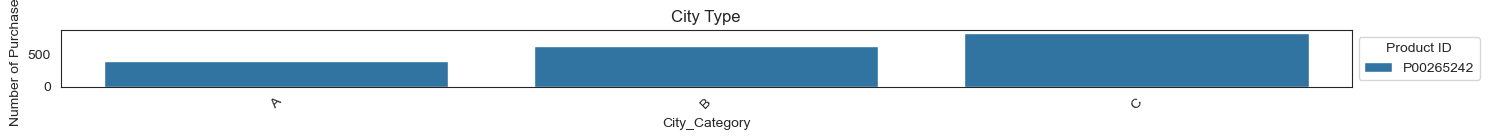

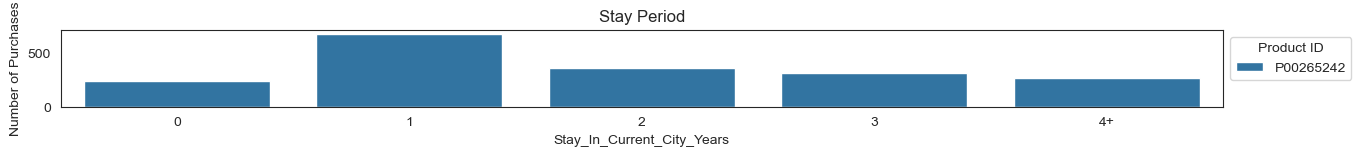



------------------------------------------------------------------- Based on Revenue -------------------------------------------------------------------




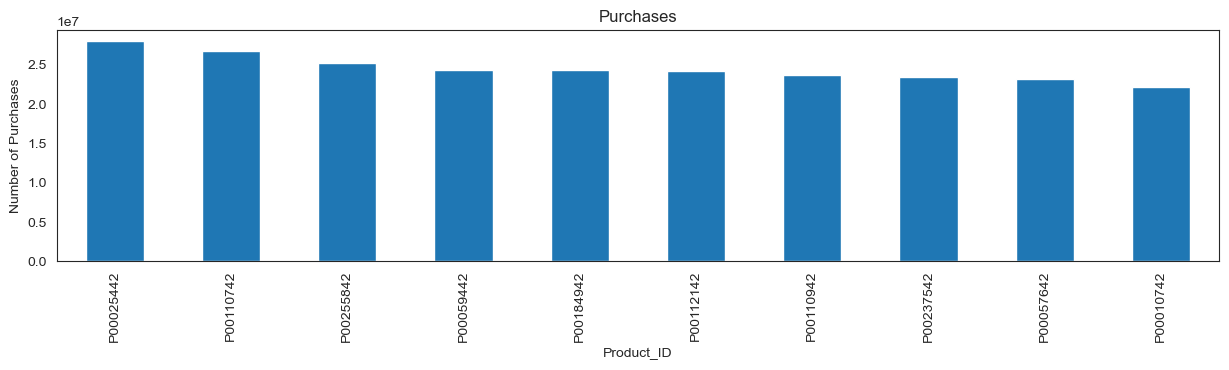

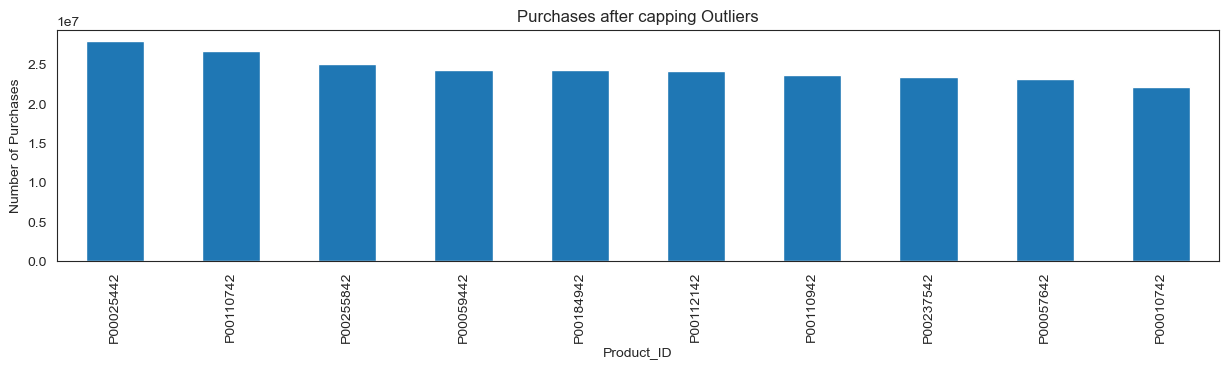

In [19]:
## columns 5 & 6

print("\n")
print("---------------------------------------------------------- Based on City Type and Years in the City ----------------------------------------------------")
print("\n")

## top preferred products by groups of different city types

plt.figure(4,figsize = (15,1.5), dpi = 100)
product_counts = df.groupby(['City_Category', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each city category

most_frequent_products = product_counts.loc[product_counts.groupby('City_Category')['Count'].idxmax()]

# Plotting
sns.barplot(x='City_Category', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('City Type')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## top preferred products by groups of different stay period

plt.figure(5,figsize = (15,1), dpi = 100)
product_counts = df.groupby(['Stay_In_Current_City_Years', 'Product_ID']).size().reset_index(name='Count')

# Find the product with the maximum count for each stay period

most_frequent_products = product_counts.loc[product_counts.groupby('Stay_In_Current_City_Years')['Count'].idxmax()]

# Plotting
sns.barplot(x='Stay_In_Current_City_Years', y='Count', hue='Product_ID', data=most_frequent_products, dodge = False)
plt.title('Stay Period')
plt.ylabel('Number of Purchases')
plt.legend(title='Product ID', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## column 10

print("\n")
print("------------------------------------------------------------------- Based on Revenue -------------------------------------------------------------------")
print("\n")

## top revenue earning products

plt.figure(6,figsize = (15,3), dpi = 100)
df.groupby("Product_ID")["Purchase"].sum().sort_values(ascending = False).head(10).plot(kind = "bar", title = "Purchases")
plt.ylabel("Number of Purchases")
plt.show()

## top revenue earning products

plt.figure(7,figsize = (15,3), dpi = 100)
df_no_outliers.groupby("Product_ID")["Purchase"].sum().sort_values(ascending = False).head(10).plot(kind = "bar",
                                                                                                    title = "Purchases after capping Outliers")
plt.ylabel("Number of Purchases")
plt.show()

###### Observations:
1. The most liked/ purchased product by Males, Females, Unmarried, and Married people on Black Friday was 'P00265242'.
2. 'P00265242' was also the most preferred purhase of age groups - '18-25', '26-35', '46-50', '51-55', and '55+'.
3. 'P00025442' was the most preferred product in age group '36-45' and 'P00255842' was the most preferred product in age group '0-17'.
4. 'P00265242' was the most preferred purchase of Occupation groups - '0', '1', '2', '3', '4', '5', '6', '7', '11', '13', '14', '16', '18', '19', and '20'.
5. 'P00057642' was the most preferred purchase of Occupation groups - '12', and '17.
6. 'P00112142' was the most preferred purchase of Occupation group - '8'.
7. 'P00034742' was the most preferred purchase of Occupation group - '9'.
8. 'P00145042' was the most preferred purchase of Occupation group - '10'.
9. 'P00025442' was the most preferred purchase of Occupation group - '15'.
10. 'P00265242' was the most preferred purchase of all the City Groups, that is, 'A', 'B', and 'C', and was purchased the most in Tier 'C'.
11. 'P00265242' was the most preferred purchase of people staying in the city for any number of years.
12. The most revenue came from 'P00025442', followed by 'P00110742', and 'P00255842' (*outliers do not impact total purchase value frequency*).

##### Analysing Product Categories

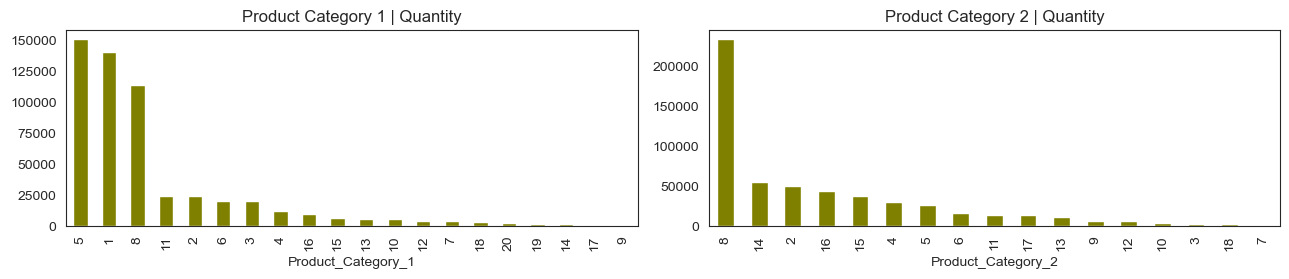

In [20]:
## plotting products vs purchase rate

plt.figure(1,figsize=(13,5))

plt.subplot(221)
df['Product_Category_1'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.xticks(rotation=90)
plt.title('Product Category 1 | Quantity')

plt.subplot(222)
df['Product_Category_2'].value_counts().plot(kind='bar',color='olive',rot=0)
plt.xticks(rotation=90)
plt.title('Product Category 2 | Quantity')

plt.tight_layout()
plt.show()

###### Observations:
1. Product 5, 1 and 8 (in the descending order) were the most promising products from Product Category 1 on Black Friday.
2. Product 8, 14 and 2 (in the descending orde) were the most promising products from Product Category 2 on Black Friday.

#### Analysis per User

In [21]:
## creating a new data frame consisting of no duplicates

## Aggregate data to get total purchase value and number of products purchased for each user

user_purchase = df.groupby('User_ID').agg({
    'Purchase': 'sum',  # Sum of purchase values
    'Product_ID': 'nunique'  # Number of unique products purchased
}).reset_index()

## Get unique user and their gender information

user_info = df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates()

## Merge the aggregated purchase data with user information

df_user = pd.merge(user_info, user_purchase, on = 'User_ID')

## Rename the columns for clarity

df_user.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
                        'Total_Purchase', 'Num_Products']

## Display the new dataframe

df_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products
0,1000001,F,0-17,10,A,2,0,334093,35
1,1000002,M,55+,16,C,4+,0,810472,77
2,1000003,M,26-35,15,A,3,0,341635,29
3,1000004,M,46-50,7,B,2,1,206468,14
4,1000005,M,26-35,20,A,1,1,821001,106


In [22]:
## creating a new data frame consisting of no duplicates and capped outliers

## Aggregate data to get total purchase value and number of products purchased for each user

user_purchase = df_no_outliers.groupby('User_ID').agg({
    'Purchase': 'sum',  # Sum of purchase values
    'Product_ID': 'nunique'  # Number of unique products purchased
}).reset_index()

## Get unique user and their gender information

user_info = df_no_outliers[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']].drop_duplicates()

## Merge the aggregated purchase data with user information

df_user_no_outliers = pd.merge(user_info, user_purchase, on = 'User_ID')

## Rename the columns for clarity

df_user_no_outliers.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
                        'Total_Purchase', 'Num_Products']

## Display the new dataframe

df_user_no_outliers.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products
0,1000001,F,0-17,10,A,2,0,334093.0,35
1,1000002,M,55+,16,C,4+,0,810940.0,77
2,1000003,M,26-35,15,A,3,0,341635.0,29
3,1000004,M,46-50,7,B,2,1,206574.0,14
4,1000005,M,26-35,20,A,1,1,820645.0,106


##### Gender

With Outliers:


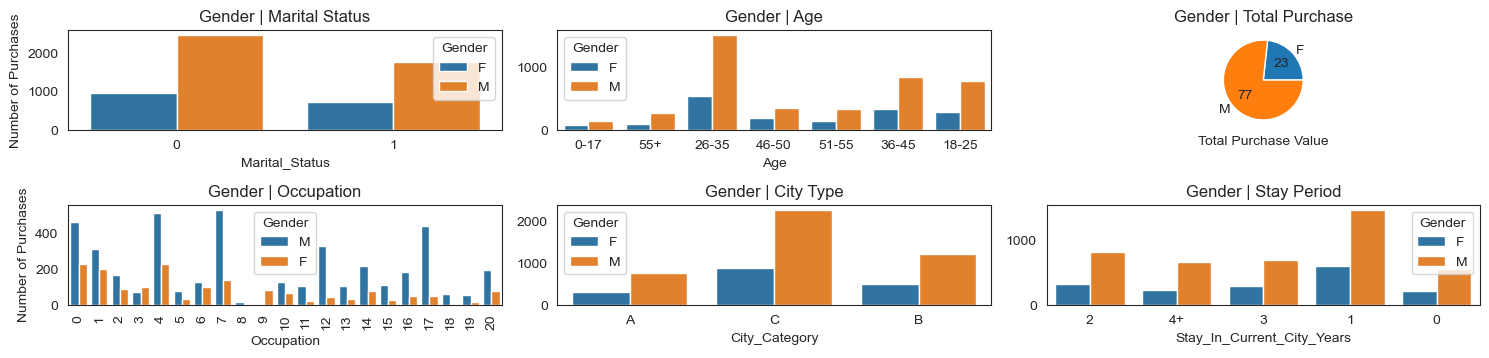

After capping Outliers:


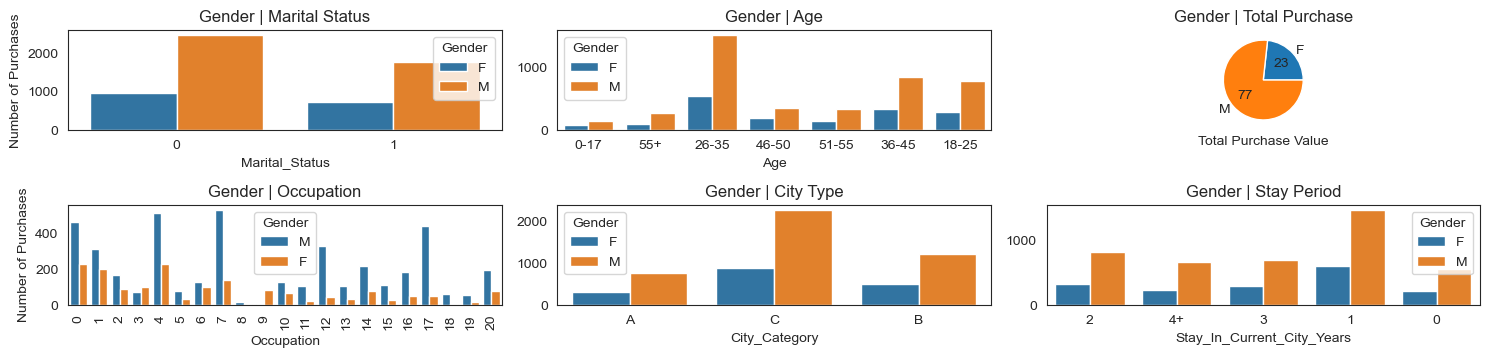

In [23]:
## column Gender with Marital Status, Age, Total purchase value, Occupation, City Type and Stay Period Categories

plt.figure(1,figsize = (15,5))
print("With Outliers:")

## Gender with Marital Status

plt.subplot(331)
sns.countplot(data = df_user, x = "Marital_Status", hue = "Gender")
plt.title("Gender | Marital Status")
plt.ylabel("Number of Purchases")

## Gender with Age

plt.subplot(332)
sns.countplot(data = df_user, x = "Age", hue = "Gender")
plt.title("Gender | Age")
plt.ylabel("")

## Gender with Total Purchase Value

plt.subplot(333)
df_user.groupby("Gender")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gender | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Gender with Occupation

plt.subplot(334)
sns.countplot(data = df_user, x = "Occupation", hue = "Gender")
plt.xticks(rotation = 90)
plt.ylabel("Number of Purchases")
plt.title("Gender | Occupation")

## Gender with City Type

plt.subplot(335)
sns.countplot(data = df_user, x = "City_Category", hue = "Gender")
plt.ylabel("")
plt.title("Gender | City Type")

## Gender with Stay Period

plt.subplot(336)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Gender")
plt.ylabel("")
plt.title("Gender | Stay Period")

plt.tight_layout()
plt.show()

## plotting with outliers capped

plt.figure(2,figsize = (15,5))
print("After capping Outliers:")

## Gender with Marital Status

plt.subplot(331)
sns.countplot(data = df_user_no_outliers, x = "Marital_Status", hue = "Gender")
plt.title("Gender | Marital Status")
plt.ylabel("Number of Purchases")

## Gender with Age

plt.subplot(332)
sns.countplot(data = df_user_no_outliers, x = "Age", hue = "Gender")
plt.title("Gender | Age")
plt.ylabel("")

## Gender with Total Purchase Value

plt.subplot(333)
df_user_no_outliers.groupby("Gender")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gender | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Gender with Occupation

plt.subplot(334)
sns.countplot(data = df_user_no_outliers, x = "Occupation", hue = "Gender")
plt.xticks(rotation = 90)
plt.ylabel("Number of Purchases")
plt.title("Gender | Occupation")

## Gender with City Type

plt.subplot(335)
sns.countplot(data = df_user_no_outliers, x = "City_Category", hue = "Gender")
plt.ylabel("")
plt.title("Gender | City Type")

## Gender with Stay Period

plt.subplot(336)
sns.countplot(data = df_user_no_outliers, x = "Stay_In_Current_City_Years", hue = "Gender")
plt.ylabel("")
plt.title("Gender | Stay Period")

plt.tight_layout()
plt.show()

###### Observations:
1. Unmarried Males have purchased the most no. of items followed by Married Males, followed by Unmarried Women, followed by Married Women.
2. Among both males and females, '26-35' age group have purchased the most number of items, followed by '36-45', '18-25',  '46-50', '51-55', '55+', and '0-17' in the descending order.
3. The Total Purchase Value between Male : Female is 77:23.
4. Males in the Occupation Categories '7', '4', '0', '17', and '12' were the highest buyers on Black Friday (Ranked from highest towards lowest).
5. Females in the Occupation Categories '4', '0', '1', '7', and '6' were the highest buyers on Black Friday (Ranked from highest towards lowest).
6. Both Males and Females in City Type C bought more products followed by City Type B, and then City Type A.
7. Both Males and Females staying in their present city for 1 year purchased more goods on Black Friday followed by people staying 2 years, 3 years, 4+ years and then people staying in the city for less than a year.
8. Outliers had no impact in overall result.

In [24]:
## mean consuming by gender for each age group

pd.pivot_table(data=df_user_no_outliers, index='Age', values='Total_Purchase', columns=['Gender'], aggfunc='mean', margins=True,
               margins_name='Mean_Value').style.background_gradient(cmap='Set3',axis=None, vmin=7999, vmax=9999)

Gender,F,M,Mean_Value
Age,,,
0-17,542945.269231,660205.578571,618250.055046
18-25,715714.832753,905158.359335,854297.468662
26-35,812028.003670,1052469.980769,988641.009742
36-45,730174.390390,937639.738609,878440.114824
46-50,640499.082418,870184.578797,791459.983051
51-55,628682.521127,817289.129794,761609.008316
55+,461169.494949,566662.351648,538587.639785
Mean_Value,711262.156663,924220.862959,863995.229842


###### Observation:
The average purchase order value for Females = "**711262.16**" while for Males = "**924220.86**"

##### Age

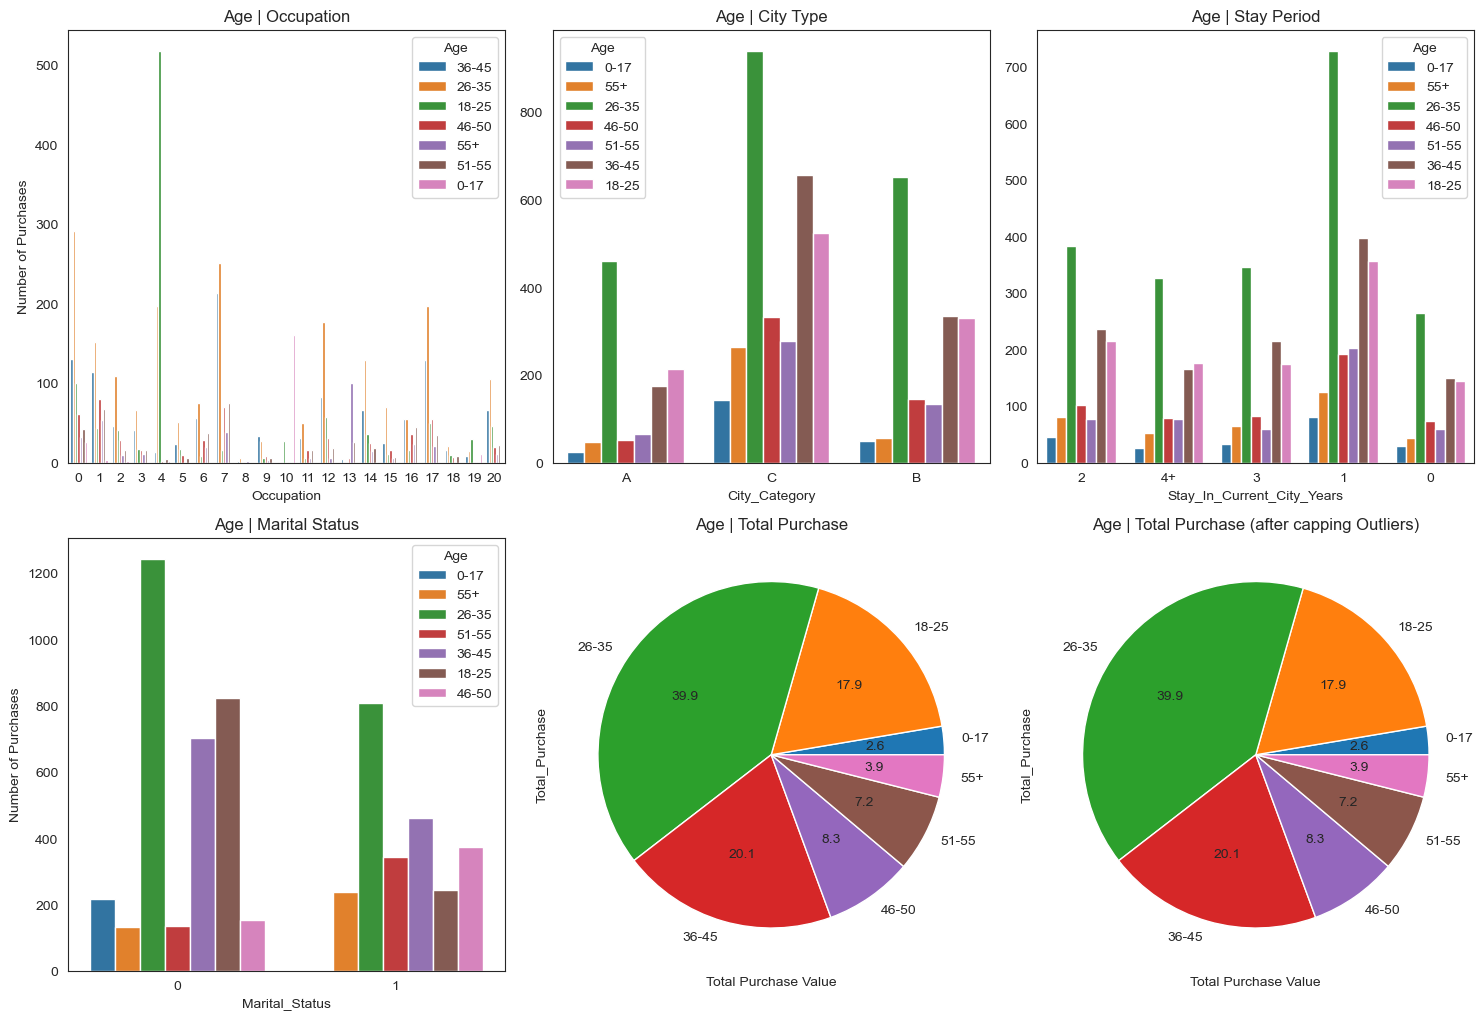

In [25]:
## column Age with Marital Status, Occupation, City Type, Stay Period, and Total purchase value

plt.figure(1,figsize = (15,15))

## Age with Occupation

plt.subplot(331)
sns.countplot(data = df_user, x = "Occupation", hue = "Age")
plt.ylabel("Number of Purchases")
plt.title("Age | Occupation")

## Age with City Type

plt.subplot(332)
sns.countplot(data = df_user, x = "City_Category", hue = "Age")
plt.ylabel("")
plt.title("Age | City Type")

## Age with Stay Period

plt.subplot(333)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Age")
plt.ylabel("")
plt.title("Age | Stay Period")

## Age with Marital Status

plt.subplot(334)
sns.countplot(data = df_user, x = "Marital_Status", hue = "Age")
plt.ylabel("Number of Purchases")
plt.title("Age | Marital Status")

## Age with Total Purchase Value

plt.subplot(335)
df_user.groupby("Age")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Age | Number of Products")
plt.title("Age | Total Purchase")
plt.xlabel("Total Purchase Value")

## Age with Total Purchase Value after capping outliers

plt.subplot(336)
df_user_no_outliers.groupby("Age")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Age | Number of Products")
plt.title("Age | Total Purchase (after capping Outliers)")
plt.xlabel("Total Purchase Value")

plt.tight_layout()
plt.show()

###### Observations:
1. Most of the purchasing Occupation from different age groups on Black Friday are as follows:
    - <b>0-17  :</b> Occupation Category '<b>10</b>'.
    - <b>18-25:</b> Occupation Category '<b>4</b>'.
    - <b>26-35:</b> Occupation Category '<b>0</b>'.
    - <b>36-45:</b> Occupation Category '<b>7</b>'.
    - <b>46-50:</b> Occupation Category '<b>1</b>'.
    - <b>51-55:</b> Occupation Category '<b>7</b>'.
    - <b>55+   :</b> Occupation Category '<b>13</b>'.
2. Almost **78%** (~ 80% approx.) of the total sales revenue came from the age brackets of '18-25', '26-35', and '36-45' years old people. 
3. '36-45' age group purchases less than age group '18-25' in City Type 'A' but it is opposite in City Type 'B', and City Type 'C'.
4. Same anomaly is observed between age groups '46-50' and '51-55'.
5. Age groups '18-25' and '51-55' shows anomaly in purchase history on Black Friday from the rest with 4+ years staying residents buying more than 3 years residents.
6. Married People in the age groups '46-50' and '51-55' purchased more on Black Friday than their unmarried counterparts, opposite to the normal.
7. The Total Purchase Order value shows similar trend to Number of units bought for all age groups.
8. Outliers have no impact in overall distribution.

##### Occupation

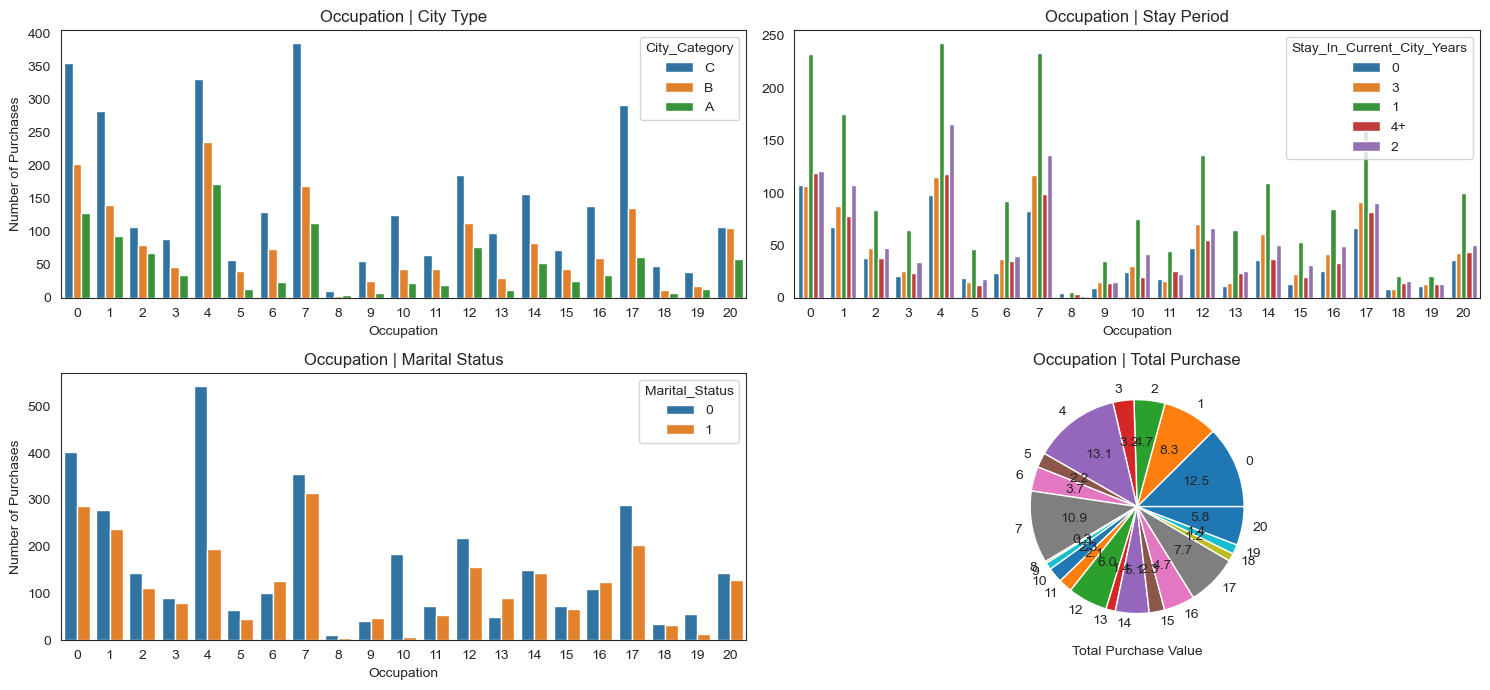

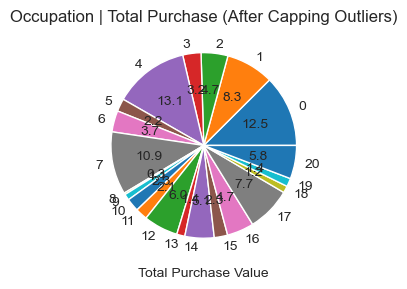

In [26]:
## column Occupation with Marital Status, City Type, Stay Period, Number of units purchased, and Total purchase value

plt.figure(1,figsize = (15,7))

## Occupation with City Type

plt.subplot(221)
sns.countplot(data = df_user, hue = "City_Category", x = "Occupation")
plt.ylabel("Number of Purchases")
plt.title("Occupation | City Type")

## Occupation with Stay Period

plt.subplot(222)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "Occupation")
plt.ylabel("")
plt.title("Occupation | Stay Period")

## Occupation with Marital Status

plt.subplot(223)
sns.countplot(data = df_user, hue = "Marital_Status", x = "Occupation")
plt.ylabel("Number of Purchases")
plt.title("Occupation | Marital Status")

## Occupation with Total Purchase Value

plt.subplot(224)
df_user.groupby("Occupation")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Occupation | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Occupation with Total Purchase Value after capping outliers

plt.figure(2,figsize = (10,3))

df_user_no_outliers.groupby("Occupation")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Occupation | Total Purchase (After Capping Outliers)")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. Top 3 in purchase volume in the 3 city types are as follows:
   - <b>A :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
   - <b>B :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
   - <b>C :</b> Occupation Category '<b>7</b>', followed by '<b>0</b>', and '<b>4</b>' (ranked in descending order).
2.  Top 3 in purchase volume depending upon the Stay Period are as follows:
    - <b>0  :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
    - <b>1  :</b> Occupation Category '<b>4</b>', followed by '<b>7</b>', and '<b>0</b>' (ranked in descending order).
    - <b>2  :</b> Occupation Category '<b>4</b>', followed by '<b>7</b>', and '<b>0</b>' (ranked in descending order).
    - <b>3  :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
    - <b>4+ :</b> Occupation Category '<b>0</b>', followed by '<b>4</b>', and '<b>7</b>' (ranked in descending order).
3. Top 3 in purchase volume based upon Marital Status are as follows:
    - <b>Unmarried :</b> Occupation Category '<b>4</b>', followed by '<b>0</b>', and '<b>7</b>' (ranked in descending order).
    - <b>Married  :</b> Occupation Category '<b>7</b>', followed by '<b>0</b>', and '<b>1</b>' (ranked in descending order).
4. Occupation Category '4' contributed most to the most in revenue, followed by Occupation Category '0' and then Occupation Category '7'.
5. Outliers have no impact in overall distribution.

##### Marital Status

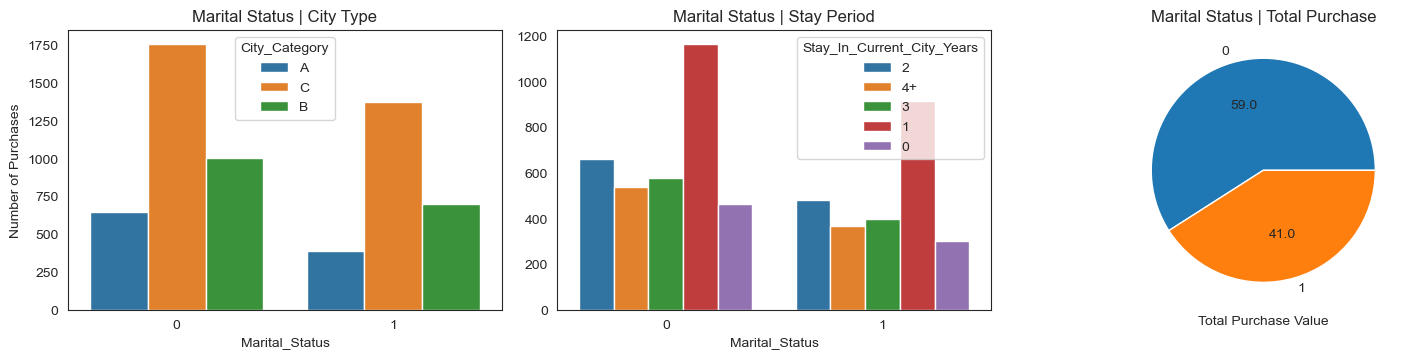

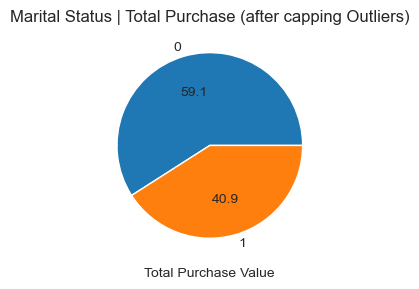

In [27]:
## column Marital Status with City Type, Stay Period, Number of units purchased, and Total purchase value

plt.figure(1,figsize = (15,10))

## Marital Status with City Type

plt.subplot(331)
sns.countplot(data = df_user, hue = "City_Category", x = "Marital_Status")
plt.ylabel("Number of Purchases")
plt.title("Marital Status | City Type")

## Marital Status with Stay Period

plt.subplot(332)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "Marital_Status")
plt.ylabel("")
plt.title("Marital Status | Stay Period")

## Marital Status with Total Purchase Value

plt.subplot(333)
df_user.groupby("Marital_Status")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Marital Status | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Marital Status with Total Purchase Value after capping Outliers

plt.figure(2, figsize = (11,3))

df_user_no_outliers.groupby("Marital_Status")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.1f")
plt.title("Marital Status | Total Purchase (after capping Outliers)")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. There is no anomaly found in this data from our previous findings.
2. Outliers had no impact in overall distribution.

##### City Category & Stay Years in Current City

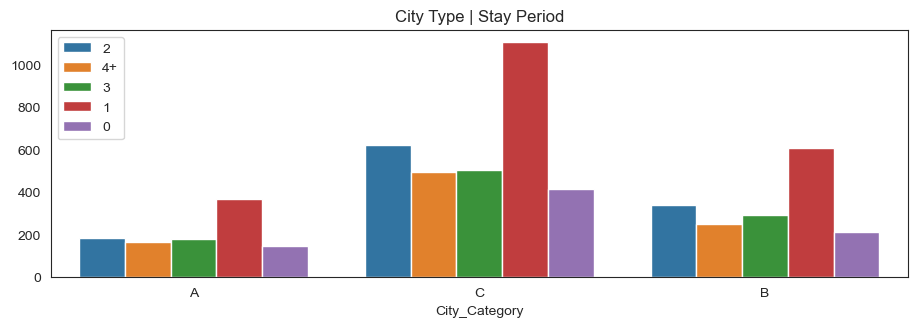

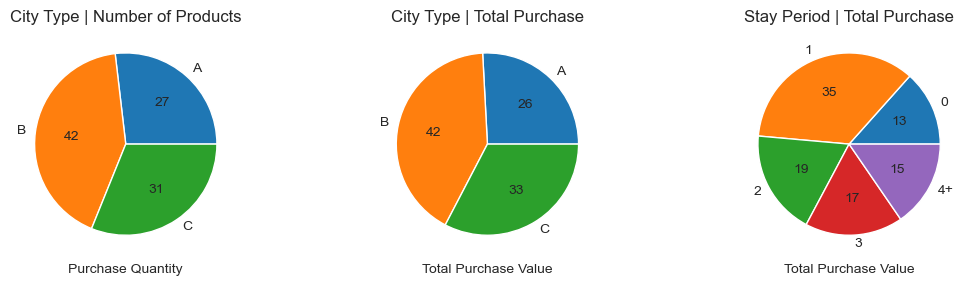

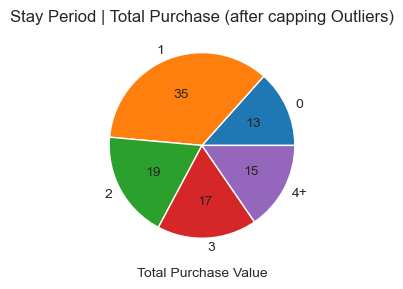

In [28]:
## column City Type with Stay Period, and Total purchase value

plt.figure(1,figsize = (18,6))

## City Type with Stay Period

plt.subplot(221)
sns.countplot(data = df_user, hue = "Stay_In_Current_City_Years", x = "City_Category")
plt.legend(loc = "upper left")
plt.ylabel("")
plt.title("City Type | Stay Period")
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (11,8))

## City Type with Number of Units Sold

plt.subplot(331)
df_user.groupby("City_Category")["Num_Products"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("City Type | Number of Products")
plt.xlabel("Purchase Quantity")
plt.ylabel("")

## City Type with Number of Units Sold

plt.subplot(332)
df_user.groupby("City_Category")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("City Type | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Stay Period with Total Purchase Value

plt.subplot(333)
df_user.groupby("Stay_In_Current_City_Years")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Stay Period | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")


plt.tight_layout()
plt.show()

## Stay Period with Total Purchase Value after capping Outliers

plt.figure(3,figsize = (11,3))

df_user.groupby("Stay_In_Current_City_Years")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Stay Period | Total Purchase (after capping Outliers)")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. There is no anomaly in city type or stay period with years of stay impacted on Black Friday sales.
2. Although the ratio of City Type : Number of Units of Purchased stays the same, the ratio in Type 'A' and 'C' has changed which indicates us that average order value in city 'C' is more than in city 'A'.
3. Outliers had no impact in overall distribution.

In [29]:
## mean consuming by gender for each city group

pd.pivot_table(data=df_user_no_outliers, index='Age', values='Total_Purchase', columns=['City_Category'], aggfunc='mean', margins=True,
               margins_name='Mean_Value').style.background_gradient(cmap='Set3',axis=None, vmin=7999, vmax=9999)

City_Category,A,B,C,Mean_Value
Age,,,,
0-17,874805.400000,967853.920000,451158.608392,618250.055046
18-25,1135836.079439,1179144.078550,534119.051527,854297.468662
26-35,1430269.475054,1283884.334356,567269.339362,988641.009742
36-45,1357757.647727,1292331.056716,538480.737805,878440.114824
46-50,1196594.169811,1290787.143836,507201.316265,791459.983051
51-55,863925.880597,1224915.244444,512857.853047,761609.008316
55+,617737.000000,870319.155172,451347.086792,538587.639785
Mean_Value,1258210.782775,1237849.951963,529453.890730,863995.229842


###### Observation:
The average product value purchased in city type **A** is "**1258210.78**", for city type **B** is "**1237849.95**", and for city type **C** is "**529453.89**".

In [30]:
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,5891.0,1.003025e+06,1743.378614,1000001.0,1001517.5,1003026.0,1004531.5,1006040.0
Occupation,5891.0,8.153285e+00,6.323140,0.0,3.0,7.0,14.0,20.0
Marital_Status,5891.0,4.199627e-01,0.493594,0.0,0.0,0.0,1.0,1.0
Total_Purchase,5891.0,8.650166e+05,943644.539683,46681.0,237678.0,521213.0,1119249.5,10536909.0
Num_Products,5891.0,9.337430e+01,107.190049,6.0,26.0,54.0,117.0,1026.0


In [31]:
df_user_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,5891.0,1.003025e+06,1743.378614,1000001.0,1001517.5,1003026.0,1004531.5,1006040.0
Occupation,5891.0,8.153285e+00,6.323140,0.0,3.0,7.0,14.0,20.0
Marital_Status,5891.0,4.199627e-01,0.493594,0.0,0.0,0.0,1.0,1.0
Total_Purchase,5891.0,8.639952e+05,942569.335232,46681.0,237351.0,521297.0,1117721.5,10522659.0
Num_Products,5891.0,9.337430e+01,107.190049,6.0,26.0,54.0,117.0,1026.0


### Multivariate Analysis

In [32]:
## creating a new column

temp_lst = []
for i in range(len(df_user)):
    temp_lst.append(df_user['Gender'][i]+"_"+str(df_user["Marital_Status"][i]))
df_user.insert(9,"Gen_Stat",temp_lst)
df_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products,Gen_Stat
0,1000001,F,0-17,10,A,2,0,334093,35,F_0
1,1000002,M,55+,16,C,4+,0,810472,77,M_0
2,1000003,M,26-35,15,A,3,0,341635,29,M_0
3,1000004,M,46-50,7,B,2,1,206468,14,M_1
4,1000005,M,26-35,20,A,1,1,821001,106,M_1


In [33]:
## creating a new column for df_user_no_outliers

temp_lst = []
for i in range(len(df_user_no_outliers)):
    temp_lst.append(df_user_no_outliers['Gender'][i]+"_"+str(df_user_no_outliers["Marital_Status"][i]))
df_user_no_outliers.insert(9,"Gen_Stat",temp_lst)
df_user_no_outliers.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Total_Purchase,Num_Products,Gen_Stat
0,1000001,F,0-17,10,A,2,0,334093.0,35,F_0
1,1000002,M,55+,16,C,4+,0,810940.0,77,M_0
2,1000003,M,26-35,15,A,3,0,341635.0,29,M_0
3,1000004,M,46-50,7,B,2,1,206574.0,14,M_1
4,1000005,M,26-35,20,A,1,1,820645.0,106,M_1


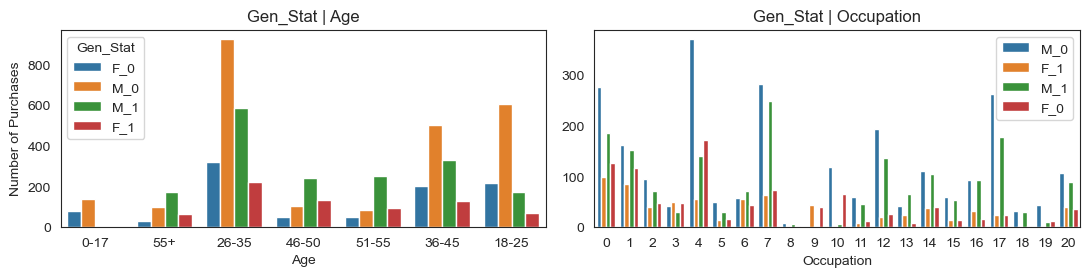

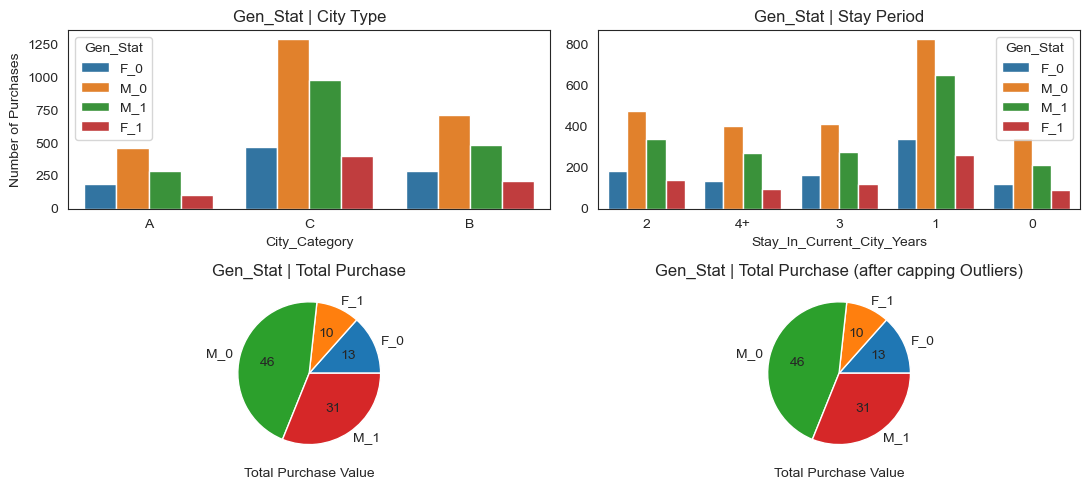

In [34]:
## Biffurcating on basis of Gender and Marital Status in one column

plt.figure(1,figsize = (11,5))

## Gen_Stat with Age

plt.subplot(221)
sns.countplot(data = df_user, x = "Age", hue = "Gen_Stat")
plt.title("Gen_Stat | Age")
plt.ylabel("Number of Purchases")

## Gen_Stat with Occupation

plt.subplot(222)
sns.countplot(data = df_user, x = "Occupation", hue = "Gen_Stat")
plt.legend(loc = 'upper right')
plt.ylabel("")
plt.title("Gen_Stat | Occupation")

plt.tight_layout()
plt.show()

plt.figure(2,figsize = (11,5))

## Gen_Stat with City Type

plt.subplot(221)
sns.countplot(data = df_user, x = "City_Category", hue = "Gen_Stat")
plt.ylabel("Number of Purchases")
plt.title("Gen_Stat | City Type")

## Gen_Stat with Stay Period

plt.subplot(222)
sns.countplot(data = df_user, x = "Stay_In_Current_City_Years", hue = "Gen_Stat")
plt.ylabel("")
plt.title("Gen_Stat | Stay Period")

## Gender with Total Purchase Value

plt.subplot(223)
df_user.groupby("Gen_Stat")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gen_Stat | Total Purchase")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

## Gender with Total Purchase Value after capping Outliers

plt.subplot(224)
df_user_no_outliers.groupby("Gen_Stat")["Total_Purchase"].sum().plot(kind = "pie", autopct = "%.0f")
plt.title("Gen_Stat | Total Purchase (after capping Outliers)")
plt.xlabel("Total Purchase Value")
plt.ylabel("")

plt.tight_layout()
plt.show()

###### Observations:
1. Unmarried males from age category '26-35' purchased the most number of items, followed by unmarried males of age category '18-25', followed by married males of age category '26-35', followed by unmarried males of age category '36-45', and finally the 5th most buying is unmarried women from age category '26-35'.
2. Unmarried males in occupation category '4' has made more number of purchases, followed by unmarried men in occupation category '7', followed by unmarried men in occupation category '0', followed by unmarried men in occupation category '17', and finally  followed by married men in occupation category '7'.
3. Unmarried males have contributed to almost 46% of the total revenue on Black Friday, followed by married male with 31% and then unmarried females with 13% and married females with 10%.
4. Outliers had no impact in overall distribution.

### Correlation

In [35]:
df.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.003810,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000793,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.016449,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.273386,-0.343703
Product_Category_2,0.003810,0.000793,0.016449,0.273386,1.000000,-0.124823
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.124823,1.000000


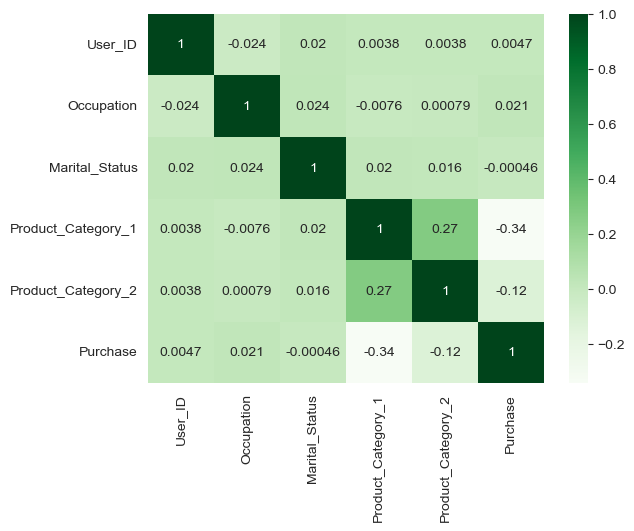

In [36]:
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

In [37]:
df_user.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Total_Purchase,Num_Products
User_ID,1.000000,-0.019323,0.002596,0.004456,0.002027
Occupation,-0.019323,1.000000,0.032028,-0.000420,-0.010552
Marital_Status,0.002596,0.032028,1.000000,-0.019379,-0.018198
Total_Purchase,0.004456,-0.000420,-0.019379,1.000000,0.978962
Num_Products,0.002027,-0.010552,-0.018198,0.978962,1.000000


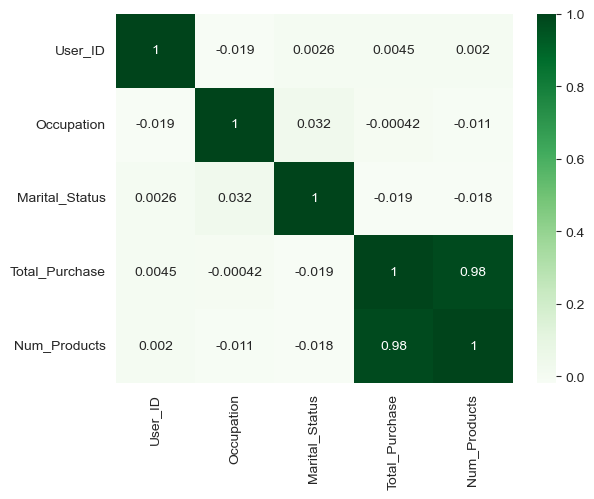

In [38]:
sns.heatmap(df_user.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

In [39]:
df_no_outliers.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.003810,0.004588
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.000793,0.020868
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.016449,-0.000661
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.273386,-0.348116
Product_Category_2,0.003810,0.000793,0.016449,0.273386,1.000000,-0.128589
Purchase,0.004588,0.020868,-0.000661,-0.348116,-0.128589,1.000000


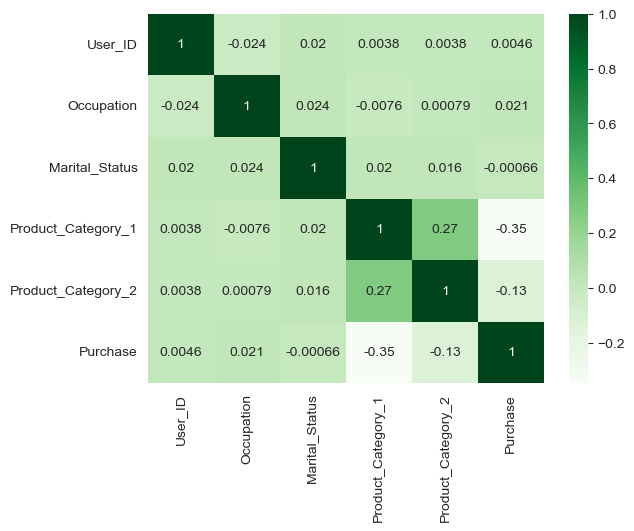

In [40]:
sns.heatmap(df_no_outliers.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

In [41]:
df_user_no_outliers.corr(numeric_only = True)

,User_ID,Occupation,Marital_Status,Total_Purchase,Num_Products
User_ID,1.000000,-0.019323,0.002596,0.004377,0.002027
Occupation,-0.019323,1.000000,0.032028,-0.000476,-0.010552
Marital_Status,0.002596,0.032028,1.000000,-0.019474,-0.018198
Total_Purchase,0.004377,-0.000476,-0.019474,1.000000,0.979066
Num_Products,0.002027,-0.010552,-0.018198,0.979066,1.000000


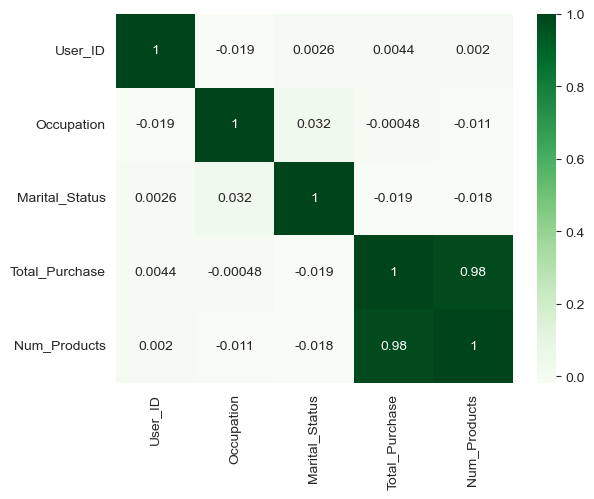

In [42]:
sns.heatmap(df_user_no_outliers.corr(numeric_only = True), annot = True, fmt = ".2g", cmap = "Greens")
plt.show()

## Findings and Recommendations

Here's our top findings and recommendations:
1. There were 5891 customers who bought from 3623 different products during Black Friday sales.
2. Most no. of products bought by a single customer is 1025 with max order value being 10536783 and average being 18583.
3. 'P00265242' got sold most of the units while 'P00025442' brought in the  most revenue. Other winning products were 'P00255842','P00110742', and 'P00255842' in any order.
4. Male : Females w.r.t. (with respect to) target column Purchase was 77:23 with males being more than thrice of buyer compared to women. Similar stat was achieved when further divided into married and unmarried with unmarried males contributed the most to the revenue (45%+) of the total sales revenue.
5. Average order value of Males was 1.3X the average order value of Females. Hence. future advertising campaigns/ product selection can be done keeping males as primary targets.
6. Almost 78% (~ 80% approx.) of the total sales revenue came from the age brackets of '18-25', '26-35', and '36-45' years old people. hence, the TA (target audience) is in the age bracket of 18 - 45 with more specific focus in '26-35' as this group solely contributed to almost 40% of the total revenue.
7. "ABC Company" was an ideal choice for City Type 'B', while in City Type 'A', it seems to have faced more competition(as average order value in City Type 'A' was more than 'B' which signifies City Type 'A' signifies city type of higher stature than 'B' and 'C'.
8. Occupation Category '4', '0', and '7' were the most frequent as well as contributed the most to sales revenue in Black Friday sales.
9. People staying in the same city for 1 year were most frequent buyers and contributed the most (probability factors: ad campaigns, offers, or more) way more than other categories of people but then there are one of the two possible scenarios:
 - The company keeps on giving huge discounts almost everyday (cheaper than marketprice atleast) OR
 - The company has still not been able to build trust enough for people staying more than 1 year in the same city because of which the no. of units sold combined in the other 4 groups are way less.
10. Outliers impacted the mean and quantile values but not on overall distribution of different categories against Total Purtchase Value (*Column:* ***Purchase***)

### Limitations

- I had to remove Product_Category_3 as it had 69% (~70%) null values.
- I had replaced all the null values in Product_Category_2 with the mode values (depending upon other results for each of the age groups in Product_Category_2).
- I had type casted all the values in product_Category_2 into integer data type after careful examination of all the uniques values(since there were no value beyond decimal point)
- Also, I have not removed the outliers (within 1% to 99% range) as they helped in finding out the maximum in each category with accuracy, instead I have capped the outliers in a copy view of original dataframe.

I hope you enjoyed it! Please share your feedback. 😄😅

Check out more such Data Analysis Projects [here](https://github.com/soumyadas96/Data-Analysis-Projects)!

[Click here to view other projects in my repository!](https://github.com/soumyadas96?tab=repositories)